In [1]:
import cv2
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
sess= tf.Session()
meta_dir = "./runs/1544344743/ckpt/model-400.meta"
print("restore model from {}".format(meta_dir))
saver = tf.train.import_meta_graph(meta_dir)
saver.restore(sess, tf.train.latest_checkpoint("./runs/1544344743/ckpt/"))
graph = tf.get_default_graph()


x_input = graph.get_tensor_by_name("input/x_input:0")
y_input = graph.get_tensor_by_name("input/y_input:0")
keep_prob = graph.get_tensor_by_name("input/keep_prob:0")
prediction = graph.get_tensor_by_name("prediction/prediction:0")
probability = graph.get_tensor_by_name("probability/probability:0")

restore model from ./runs/1544344743/ckpt/model-400.meta
INFO:tensorflow:Restoring parameters from /data/repository/TT/TT/finetune_alexnet_with_tensorflow/runs/1544344743/ckpt/model-400


(-0.5, 1919.5, 1079.5, -0.5)

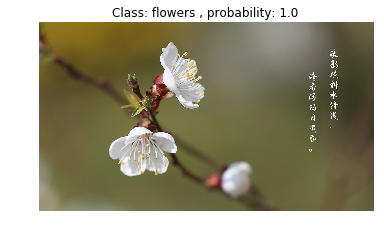

In [9]:
class_dic = {
    0: "bus",
    1: "dinosaurs",
    2: "elephants",
    3: "flowers",
    4: "hourse"
}
imagenet_mean = np.array([104., 117., 124.], dtype=np.float32)
img_origin = cv2.imread("./data/test/timg.jpg")
# Convert image to float32 and resize to (227x227)
img = cv2.resize(img_origin.astype(np.float32), (227, 227))
# Subtract the ImageNet mean
img -= imagenet_mean
# Reshape as needed to feed into model
img = img.reshape((1, 227, 227, 3))

probs = sess.run(probability, feed_dict={x_input: img,
                                         keep_prob: 1.0}
                )

class_name = class_dic[np.argmax(probs)]

plt.imshow(cv2.cvtColor(img_origin, cv2.COLOR_BGR2RGB))
plt.title("Class: {} , probability: {} ".format(class_name, probs[0, np.argmax(probs)]))
plt.axis('off')